# Comparação de popularidade Barbie x Oppenheimer utilizando o Google Trends

In [18]:

import geopandas as gpd
import geobr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
from pytrends.request import TrendReq
import pytz


In [19]:


# Definir os parâmetros da consulta
kw_list = ["barbie", "oppenheimer"]  # Barbie vs Oppenheimer
timeframe = "2023-07-15 2023-07-23"  # Intervalo de tempo de 15 de julho de 2023 a 23 de julho de 2023
geo = "BR"  # Brasil


# Configurar a API do Google Trends
pytrends = TrendReq(hl='pt-BR', tz= -180)

# Obter os dados do Google Trends para cada estado
pytrends.build_payload(kw_list, timeframe=timeframe, geo=geo)
data = pytrends.interest_by_region(resolution='REGION', inc_low_vol=True)

# Criar um DataFrame com os dados
df = pd.DataFrame(data)

# Exibir o DataFrame com os resultados
print(df)


                     barbie  oppenheimer
geoName                                 
Acre                     88           12
Alagoas                  86           14
Amapá                    85           15
Amazonas                 83           17
Bahia                    90           10
Ceará                    87           13
Distrito Federal         84           16
Espírito Santo           87           13
Goiás                    87           13
Maranhão                 88           12
Mato Grosso              85           15
Mato Grosso do Sul       85           15
Minas Gerais             89           11
Paraná                   87           13
Paraíba                  89           11
Pará                     88           12
Pernambuco               88           12
Piauí                    87           13
Rio Grande do Norte      84           16
Rio Grande do Sul        87           13
Rio de Janeiro           89           11
Rondônia                 87           13
Roraima         

# Normalização para intervalo entre -1 e 1

In [20]:
min = 0 # minimo antigo
max = 100 # maximo antigo
novo_min = -1 
novo_max = 1

In [21]:
df['diferenca'] = df.barbie - df.oppenheimer

In [22]:
df['normalizado'] = ((df.diferenca - min)/(max - min)*(novo_max - novo_min)) + novo_min # formula de normalização

In [23]:
df = df.reset_index()

In [24]:
df

,geoName,barbie,oppenheimer,diferenca,normalizado
0,Acre,88,12,76,0.52
1,Alagoas,86,14,72,0.44
2,Amapá,85,15,70,0.40
3,Amazonas,83,17,66,0.32
4,Bahia,90,10,80,0.60
5,Ceará,87,13,74,0.48
6,Distrito Federal,84,16,68,0.36
7,Espírito Santo,87,13,74,0.48
8,Goiás,87,13,74,0.48
9,Maranhão,88,12,76,0.52


# Download do mapa do Brasil

In [25]:
states = geobr.read_state(
  code_state = "all",
  year = 2019,
  simplified = True,
  verbose = True
)

Loading data for the whole country



## Organizando em ordem crescente 

In [26]:
df = df.sort_values(by=['geoName'])

In [27]:
brasil = states.sort_values(by=['name_state'])

In [28]:
df

,geoName,barbie,oppenheimer,diferenca,normalizado
0,Acre,88,12,76,0.52
1,Alagoas,86,14,72,0.44
2,Amapá,85,15,70,0.40
3,Amazonas,83,17,66,0.32
4,Bahia,90,10,80,0.60
5,Ceará,87,13,74,0.48
6,Distrito Federal,84,16,68,0.36
7,Espírito Santo,87,13,74,0.48
8,Goiás,87,13,74,0.48
9,Maranhão,88,12,76,0.52


In [29]:
brasil = brasil.reset_index(drop=True)

In [30]:
brasil

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.08554 ..."
1,27.0,AL,Alagoas,2.0,Nordeste,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75839 ..."
2,16.0,AP,Amapá,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44252 2..."
3,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.71230 ..."
4,29.0,BA,Bahia,2.0,Nordeste,"MULTIPOLYGON (((-38.69616 -17.97901, -38.69629..."
5,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-41.18292 -4.01797, -41.18862 ..."
6,53.0,DF,Distrito Federal,5.0,Centro Oeste,"MULTIPOLYGON (((-47.81455 -16.04995, -48.27781..."
7,32.0,ES,Espírito Santo,3.0,Sudeste,"MULTIPOLYGON (((-40.75189 -20.92722, -40.75601..."
8,52.0,GO,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-52.36102 -16.08160, -52.35780..."
9,21.0,MA,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-44.53830 -2.02124, -44.53542 ..."


# Merge entre os dataframes

In [31]:
merged_df = pd.concat([brasil, df], axis=1)

In [32]:
merged_df

,code_state,abbrev_state,name_state,code_region,name_region,geometry,geoName,barbie,oppenheimer,diferenca,normalizado
0,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.08554 ...",Acre,88,12,76,0.52
1,27.0,AL,Alagoas,2.0,Nordeste,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75839 ...",Alagoas,86,14,72,0.44
2,16.0,AP,Amapá,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44252 2...",Amapá,85,15,70,0.40
3,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.71230 ...",Amazonas,83,17,66,0.32
4,29.0,BA,Bahia,2.0,Nordeste,"MULTIPOLYGON (((-38.69616 -17.97901, -38.69629...",Bahia,90,10,80,0.60
5,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-41.18292 -4.01797, -41.18862 ...",Ceará,87,13,74,0.48
6,53.0,DF,Distrito Federal,5.0,Centro Oeste,"MULTIPOLYGON (((-47.81455 -16.04995, -48.27781...",Distrito Federal,84,16,68,0.36
7,32.0,ES,Espírito Santo,3.0,Sudeste,"MULTIPOLYGON (((-40.75189 -20.92722, -40.75601...",Espírito Santo,87,13,74,0.48
8,52.0,GO,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-52.36102 -16.08160, -52.35780...",Goiás,87,13,74,0.48
9,21.0,MA,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-44.53830 -2.02124, -44.53542 ...",Maranhão,88,12,76,0.52


# Plot da comparação no mapa do Brasil

In [33]:
cmap = LinearSegmentedColormap.from_list(name = 'barbie_pink', colors = ['White', '#4B0082', '#FF1493'])
norm = mcolors.Normalize(vmin = -1, vmax= 1)

C:\Users\muril\AppData\Roaming\Python\Python311\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\muril\AppData\Local\Programs\Python\Python311\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
c:\Users\muril\AppData\Local\Programs\Python\Python311\Lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


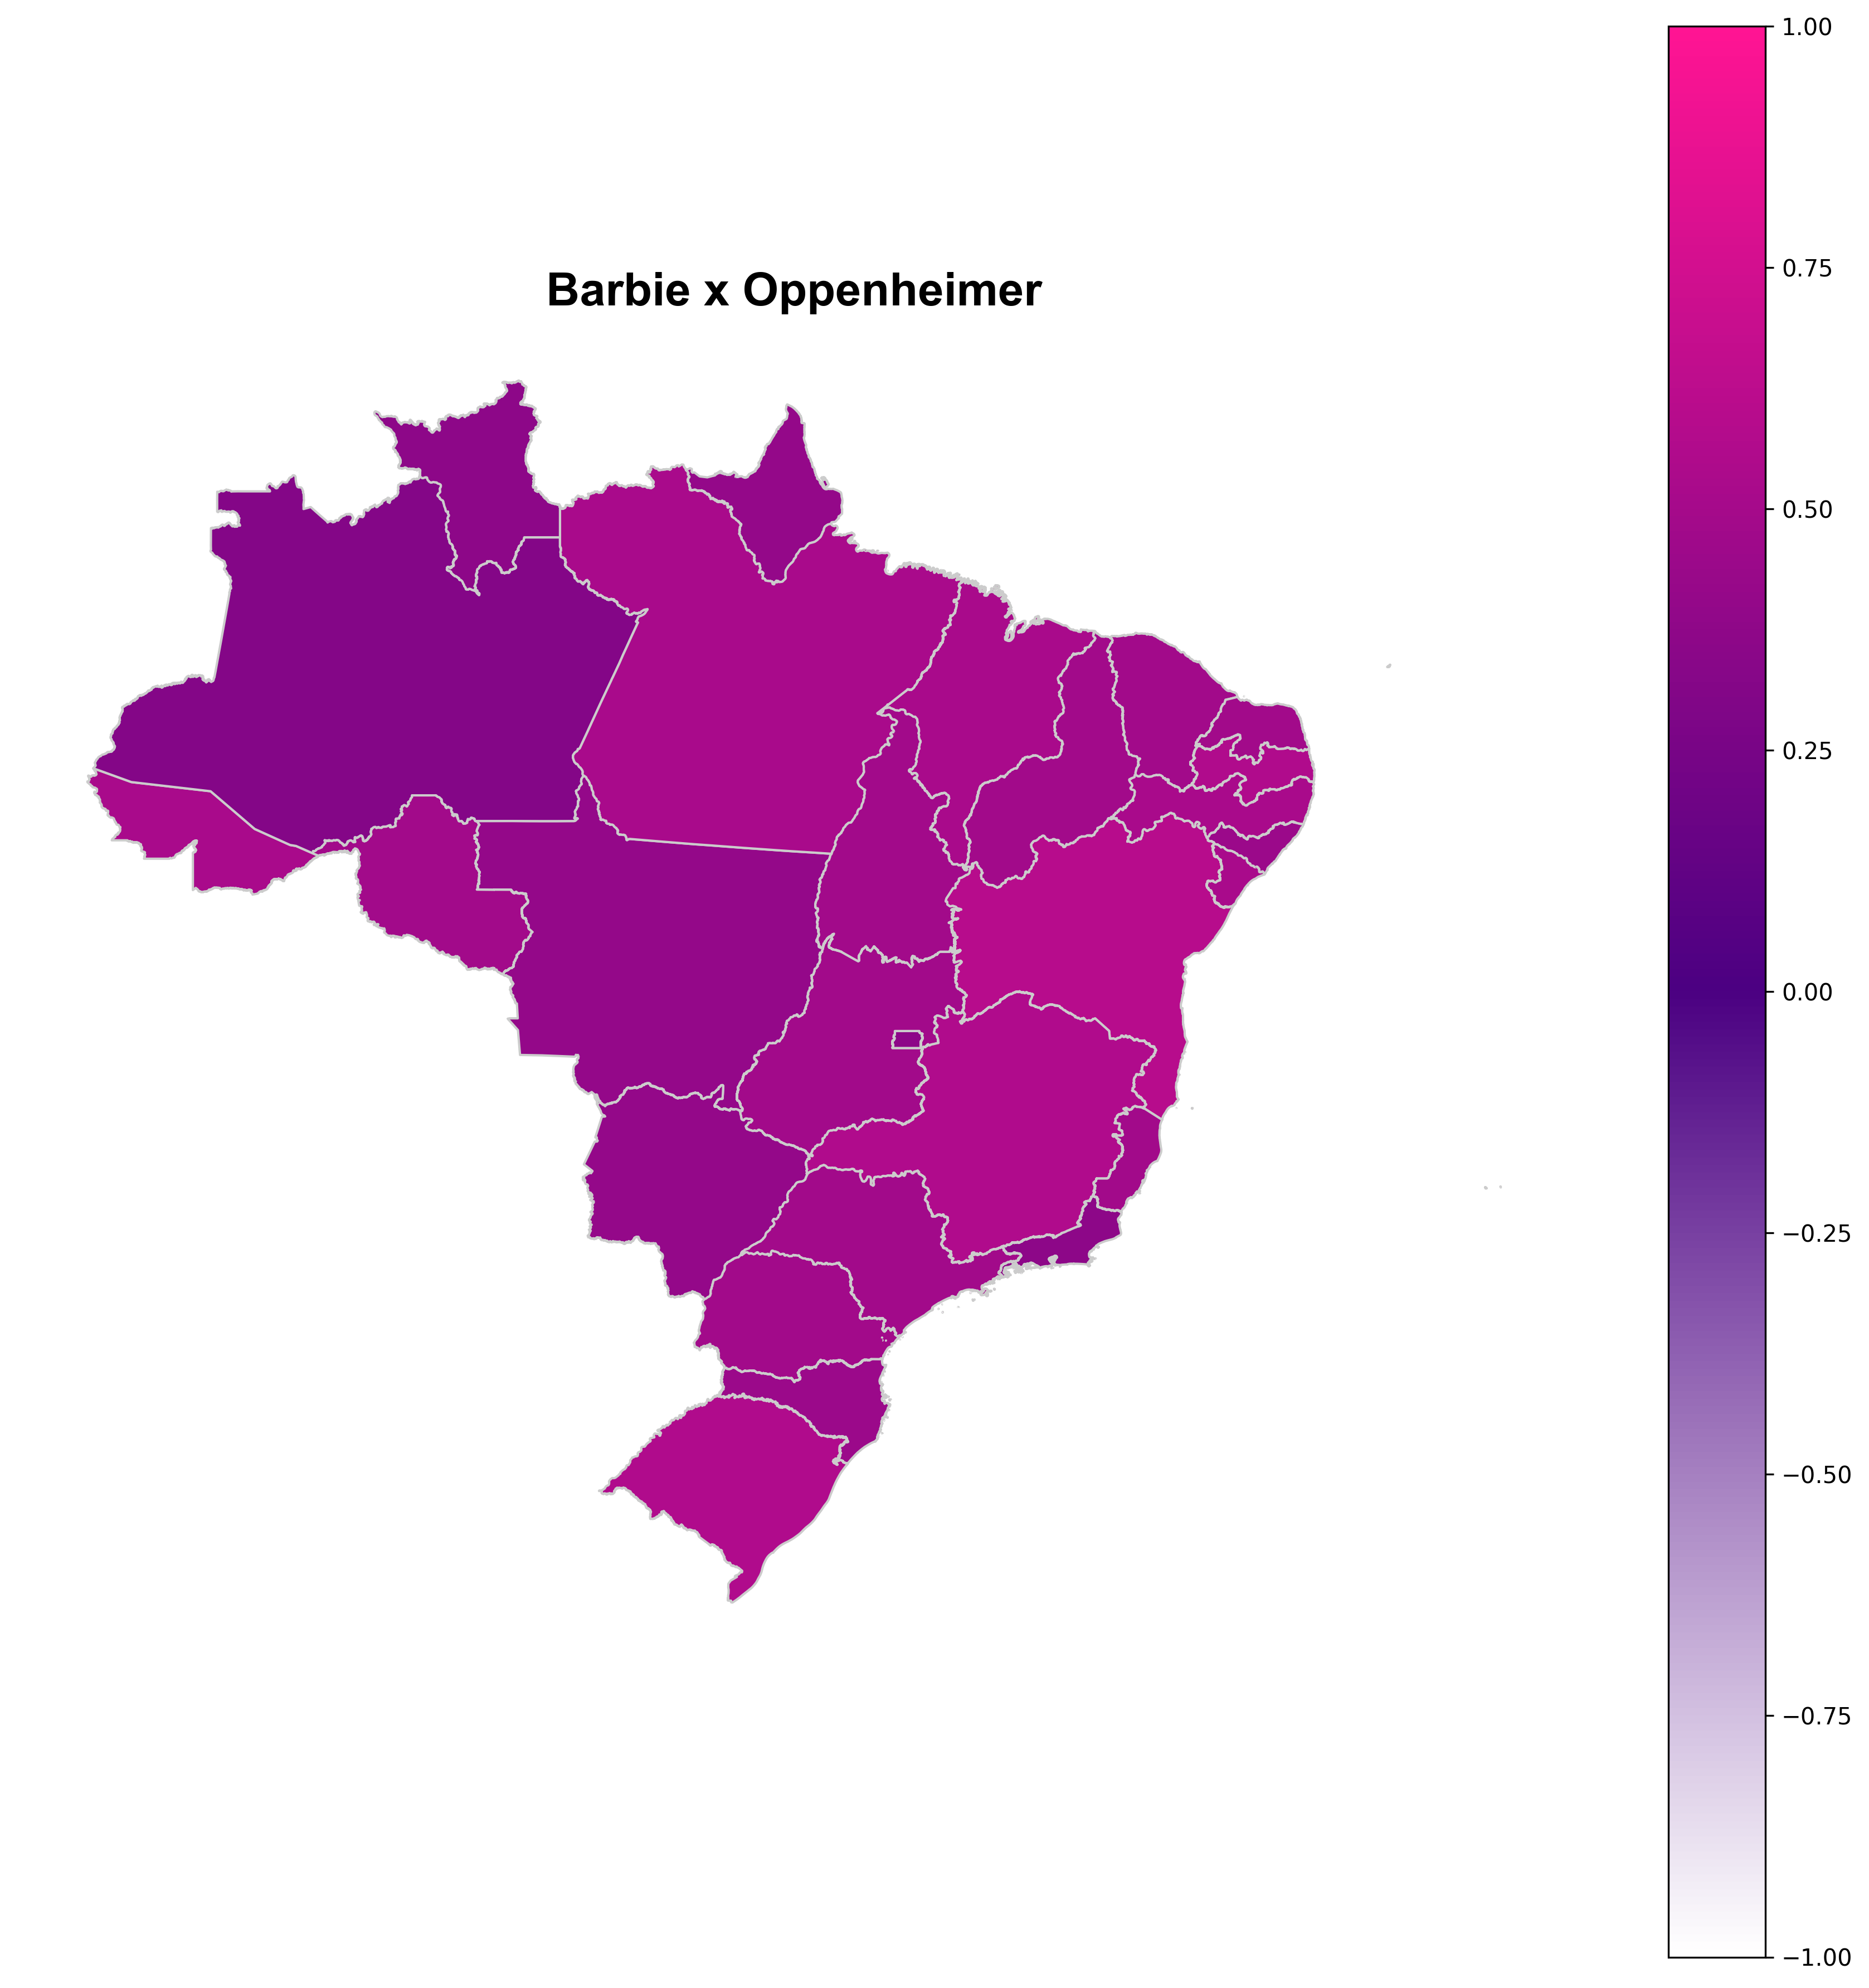

In [35]:
# Plot all Brazilian states
fig, ax = plt.subplots(figsize=(15, 15), dpi=300)

merged_df.plot(column = 'normalizado', cmap = cmap, ax=ax, edgecolor = '0.8', legend = True, norm = norm)

ax.set_title("Barbie x Oppenheimer", fontsize=20, fontweight='bold', fontname='Arial')
ax.axis("off")

# Salvar a figura em um arquivo de imagem
plt.savefig('mapa_barbie_oppenheimer.png', dpi=300, bbox_inches='tight')
